In [1]:
import numpy as np
import PIL
import math
import random

In [2]:
import numpy as np
from PIL import Image, ImageDraw
import math


def bezier_curve(points, num_points=100):
    n = len(points) - 1
    t = np.linspace(0, 1, num_points)[:, None]  # Ensure t is a column vector
    curve = np.zeros((num_points, 2))
    basis = {}

    for i in range(n + 1):
        binomial_coefficient = math.comb(n, i)
        print(binomial_coefficient)
        curve += binomial_coefficient * (t ** i) * ((1 - t) ** (n - i)) * points[i]
        
    return curve


# Define control points
control_points = np.array([[50, 100], [150, 50], [200, 200], [250, 50], [300, 50]])

# Generate the Bézier curve
curve = bezier_curve(control_points)

# Create an image and draw the curve
image = Image.new("RGB", (1000, 1000), "white")
draw = ImageDraw.Draw(image)

# Draw control points
for point in control_points:
    draw.ellipse((point[0] - 3, point[1] - 3, point[0] + 3, point[1] + 3), fill="blue")

# Draw lines between control points
for i in range(len(control_points) - 1):
    draw.line((control_points[i][0], control_points[i][1], control_points[i + 1][0], control_points[i + 1][1]),
              fill="red", width=1)

# Draw the Bézier curve
for i in range(len(curve) - 1):
    draw.line((curve[i][0], curve[i][1], curve[i + 1][0], curve[i + 1][1]), fill="black", width=2)


# Save the image
image.save("bezier_curve.png")
image.show()

1
4
6
4
1


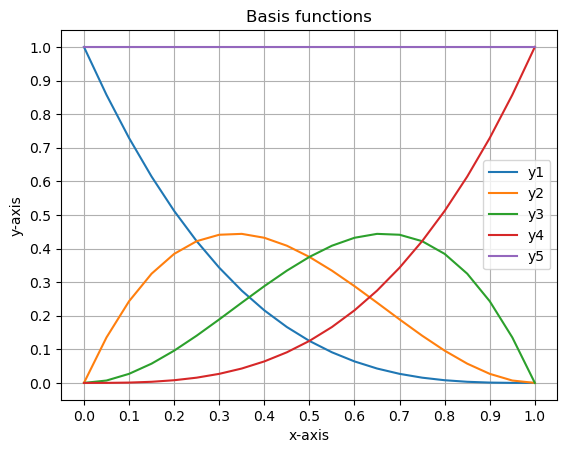

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def basis_func_display():
    # Inputs
    p0 = [0.0, 1.0]
    p1 = [0.0, 0.0]
    p2 = [1.0, 0.0]
    t = np.linspace(0, 1, 21).reshape(-1, 1)
    
    # To plot
    y1 = (1-t)**3
    y2 = 3*(1-t)**2 * t
    y3 = 3*(1-t)*t**2
    y4 = t**3
    y5 = y1 + y2 + y3 + y4
    
    fig, ax = plt.subplots()
    ax.set_title('Basis functions')
    
    # Axes style
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_xticks(np.linspace(0, 1, 11))
    ax.set_yticks(np.linspace(0, 1, 11))
    
    # Grids
    ax.grid(axis='both')
    
    # Plotting
    ax.plot(t, y1, label='y1')
    ax.plot(t, y2, label='y2')
    ax.plot(t, y3, label='y3')
    ax.plot(t, y4, label='y4')
    ax.plot(t, y5, label='y5')
    
    ax.legend()
    
    plt.show()
    
basis_func_display()